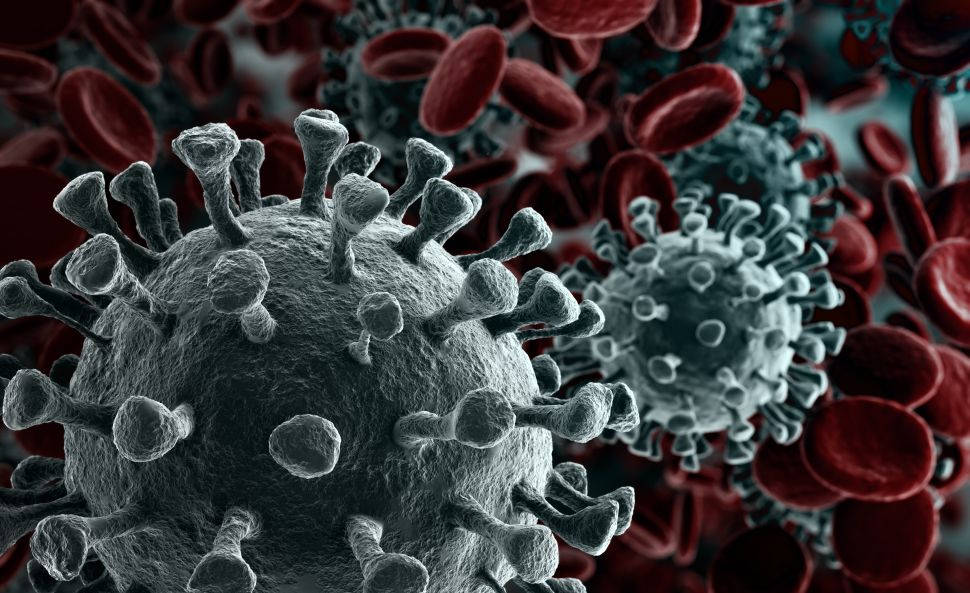

### **What is a Coronavirus?**
    Coronaviruses are a group of pathogenic viruses that cause illness in mammals and birds. Human coronaviruses were first discovered in the 1960s; these viruses are a class of enveloped, single stranded-RNA viruses with the ability to cause respiratory tract infections in their host. Notable outbreaks include the severe acute respiratory syndrome coronavirus (SARS-CoV) in 2003 and Middle East respiratory syndrome-related coronavirus (MERS-CoV) in 2012. Coronoaviruses are primarily transmit from human to human through contact with respiratory droplets.
    
**What is COVID-19?**
    COVID-19 is the popular term to refer to the ongoing pandemic of the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). SARS-CoV-2 is a bat-borne virus that was discovered in Wuhan, China in December of 2019. This virus causes respiratory illness and flu-like symptoms including cough, fever, and difficulty breathing in severe cases. Since its discovery, the virus spread throughout China and on to more than one hundred other countries across the globe. The World Health Organization (WHO) declared the outbreak a Public Health Emergency of International Concern on January 30th, 2020 and a pandemic on March 11th, 2020.

**Analysis**
    The goal of this analysis is to visualize the cases reported in the US since the first identified case in Washington on January 21st, 2020. The data in this dataset includes information on the state, fips(county data), cases, and deaths on every day since the outbreak. It is important to note that the number of cases/deaths in this dataset is the cumulative number of cases/deaths on that given date. The dataset was supplied by the New York Times public list of reported cases.

**Updated for 8/3/2020 Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

In [ ]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
df= pd.read_csv(url)
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df_cases_deaths = df.drop(columns = ['fips'])
df_cases_deaths.describe()

In [ ]:
#Converting date to datetime object
df['date'] = pd.to_datetime(df['date'])

#Top 10 cases by state
grouped_state = df.groupby("state")
grouped_state = grouped_state.agg({"cases": "max"})
grouped_state = grouped_state.sort_values(by='cases', ascending=False)
grouped_state = grouped_state.reset_index(drop=False)
grouped_state.head(10)

In [ ]:
#Top 10 deaths by state
grouped_death = df.groupby("state")
grouped_death = grouped_death.agg({"deaths": "max"})
grouped_death = grouped_death.sort_values(by='deaths', ascending=False)
grouped_death = grouped_death.reset_index(drop=False)
grouped_death.head(10)

In [ ]:
import plotly.graph_objects as go

#Creating labels/size list for pie chart
statelist = grouped_state['state'].tolist()
caseslist = grouped_state['cases'].tolist()

labels = statelist
sizes = caseslist

#Plotting percentage of cases by state
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, hole=.5)])
fig.update_layout(
    title='Percentage of Total Cases Reported by State',
    margin=dict(l=20, r=20, t=30, b=125),
    paper_bgcolor="White",
)
fig.show()


In [ ]:
#Creating labels/size list for pie chart
statelist = grouped_death['state'].tolist()
caseslist = grouped_death['deaths'].tolist()

labels = statelist
sizes = caseslist

#Plotting percentage of deaths by state
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, hole=.5)])
fig.update_layout(
    title='Percentage of Total Deaths Reported by State',
    margin=dict(l=20, r=20, t=40, b=120),
    paper_bgcolor="White",
)
fig.show()

In [ ]:
#Plotting top 10 reported cases by states as timeseries
warnings.filterwarnings('ignore')
topstates = df.loc[df['state'].isin(['New York', 'New Jersey', 'California', 'Washington', 'Michigan', 'Massachusetts', 'Florida', 'Illinois', 'Louisiana', 'Pennsylvania'])]
plt.subplots(figsize=(15,8))
sns.lineplot(data = topstates, x='date', y='cases', hue='state').set_title("Timeline of Reported Cases in Top 10 Affected States")

The lineplot shows us that the number of reported **cases** increased dramatically in just the past two weeks. The state with the **highest** number of reported cases is **New York**.

In [ ]:
#Plotting top 10 reported cases by states as timeseries
warnings.filterwarnings('ignore')
topstates = df.loc[df['state'].isin(['New York', 'New Jersey', 'California', 'Washington', 'Michigan', 'Massachusetts', 'Florida', 'Illinois', 'Louisiana', 'Pennsylvania'])]
plt.subplots(figsize=(15,8))
sns.lineplot(data = topstates, x='date', y='deaths', hue='state').set_title("Timeline of Reported Deaths in Top 10 Affected States")

The lineplot shows us that the number of reported **deaths** increased dramatically in just the past two weeks. The states with the **highest** number of reported deaths are **New York**.

In [ ]:
#merge dataframe
casesdeaths = pd.merge(grouped_state, grouped_death, on='state')

#Viewing cases and deaths on barplot
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 30))

# Plot the total cases
sns.set_color_codes("pastel")
sns.barplot(x="cases", y="state", data=casesdeaths,
            label="Cases", color="b")

# Plot the cases where death was involved
sns.set_color_codes("muted")
sns.barplot(x="deaths", y="state", data=casesdeaths,
            label="Deaths", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100000), ylabel="",
       xlabel="Deaths per Cases",
      title='Visualizing deaths per cases'
      )
sns.despine(left=True, bottom=True)


In [ ]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
countiesdf = pd.read_csv(url, dtype={"fips": str})
countiesdf.head()

In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

#Plotting confirmed cases on US map
fig = px.choropleth(countiesdf, geojson=counties, locations='fips', color='cases',
                           color_continuous_scale="Viridis",
                           range_color=(0, 500),
                           scope="usa",
                           labels={'cases':'confirmed cases'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
print('Summary: \n')
print("There are currently " + str(casesdeaths['cases'].sum()) + " cases of coronavirus in the US and " + str(casesdeaths['deaths'].sum()) + " deaths.\n")
print("The states with the most amount of cases are: \n" + str(grouped_state['state'].iloc[:10].to_string()) + "\n\nand they have the following number of cases, respectively:\n\n" + str(grouped_state['cases'].iloc[:10].to_string()))